In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/test_file.csv
/kaggle/input/train-file/train_file.csv


# Import libraries

In [12]:
import pandas as pd
print('Pandas : ',pd.__version__)
import matplotlib.pyplot as plt
import seaborn as sns
print('Seaborn : ',sns.__version__)
import numpy as np
print('Numpy : ',np.__version__)

plt.style.use('tableau-colorblind10')
print('Pyplot style : ggplot' )
sns.set_palette('Set2')
print('Seaborn palette : Set2')

Pandas :  1.0.3
Seaborn :  0.10.0
Numpy :  1.18.1
Pyplot style : ggplot
Seaborn palette : Set2


# Import train data

In [13]:
df_train = pd.read_csv('/kaggle/input/train-file/train_file.csv')
df_test = pd.read_csv('/kaggle/input/test-file/test_file.csv')
train = df_train.copy()
test = df_test.copy()

# Explore datasets

In [14]:
def explore():
    print('Train data : ')
    print(train.info(),'\n')
    print(train.describe(include = 'all'), '\n')
    
    print('Test data : ')
    print(test.info(),'\n')
    print(test.describe(include = 'all'), '\n')    

In [15]:
explore()

Train data : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None 

         Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    6

In [16]:
print('Train data\'s sample :')
display(train.sample(5))

print('Test data\'s sample :')
display(test.sample(5))

Train data's sample :


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
80,LP001265,Female,No,0,Graduate,No,3846,0.0,111.0,360.0,1.0,Semiurban,Y
305,LP001990,Male,No,0,Not Graduate,No,2000,0.0,NaN,360.0,1.0,Urban,N
434,LP002390,Male,No,0,Graduate,No,3750,0.0,100.0,360.0,1.0,Urban,Y
243,LP001807,Male,Yes,2,Graduate,Yes,6250,1300.0,108.0,360.0,1.0,Rural,Y
156,LP001541,Male,Yes,1,Graduate,No,6000,0.0,160.0,360.0,NaN,Rural,Y


Test data's sample :


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
289,LP002593,Male,Yes,1,Graduate,No,8333,4000,NaN,360.0,1.0,Urban
231,LP002298,NaN,No,0,Graduate,Yes,2860,2988,138.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
68,LP001359,Male,Yes,0,Graduate,No,7666,0,187.0,360.0,1.0,Semiurban
296,LP002614,NaN,No,0,Graduate,No,6478,0,108.0,360.0,1.0,Semiurban


[Text(0.5, 0, 'no. of unique values'),
 Text(0.5, 1.0, 'Unique values for each categorical columns')]

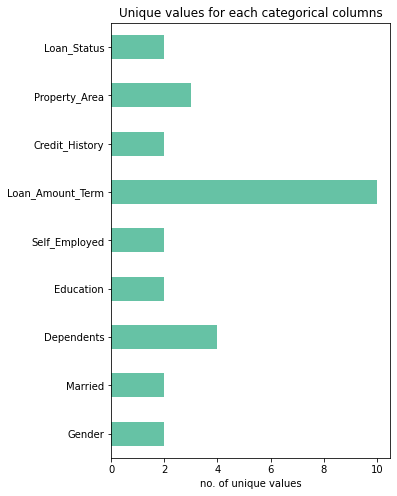

In [17]:
fig,ax = plt.subplots(figsize = (5,8))
train.loc[:,train.nunique() < 100].nunique().plot(kind = 'barh',ax=ax)
ax.set(xlabel = 'no. of unique values', title = 'Unique values for each categorical columns')

- Loan amount term has the highest unique values while others are mostly binary ( 2 )

# Check NA

In [18]:
train_na = train.isna().sum()
test_na = test.isna().sum()
# proportion of no.of missing values to whole datasets
train_pct = train.isna().sum() / len(train) * 100
test_pct = test.isna().sum() / len(test) * 100

pd.concat([train_na, train_pct, test_na, test_pct],axis = 'columns', keys=['Train','Train pct','Test','Test pct'])

,Train,Train pct,Test,Test pct
Loan_ID,0,0.000000,0.0,0.000000
Gender,13,2.117264,11.0,2.997275
Married,3,0.488599,0.0,0.000000
Dependents,15,2.442997,10.0,2.724796
Education,0,0.000000,0.0,0.000000
Self_Employed,32,5.211726,23.0,6.267030
ApplicantIncome,0,0.000000,0.0,0.000000
CoapplicantIncome,0,0.000000,0.0,0.000000
LoanAmount,22,3.583062,5.0,1.362398
Loan_Amount_Term,14,2.280130,6.0,1.634877


- we can see that for most of the columns in both datasets, there is few missing values ( range between 1% to 8% of the data )

# Functions

In [19]:
def drop_col(col):
    '''Drop columns from train and test datasets. 
    Args :
        col(str / list) : name or names ( list ) of columns to be drop
    '''
    train.drop(col,axis = 1, inplace = True)
    test.drop(col,axis = 1, inplace = True)

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow'if v else '' for v in is_max]

def count_var(data, x):
    '''Count the data by cols.
    Args :
        data (df) : data to be count
        x (str / list) : name or names of columns to be count
    '''
    print('{}\'s counts'.format(x))
    temp = data[x].value_counts()
    temp2 = data[x].value_counts(normalize = True)
    df = pd.concat([temp,temp2], axis = 'columns', keys = ['Counts','Proportion'])
    display(df.style.apply(highlight_max))
    
    # plot 
    fig,ax = plt.subplots(1,2,figsize = (8,5))
    sns.countplot(x = x, data = data,ax=ax[0])
    ax[0].set(title = x)
    
    temp2.plot(kind = 'bar',ax=ax[1])
    plt.xticks(rotation = False)
    ax[1].set(title = x, xlabel = x)

def bivariate(data, x, hue, columns):
    '''Perform bivariate analysis.
    Args:
        data (df) : data
        x (str / list) : target variable
        hue ('str / list') : 2nd target variable
        columns : hue\'s label order
    '''
    # show the counts of x by hue
    temp = data.groupby(x)[hue].value_counts()
    # show the proportion of hue according to x
    temp2 = data.groupby(x)[hue].value_counts(normalize = True)
    # show the overall proportion of x with hue 
    temp3 = (data.groupby([x,hue])[hue].size() / len(data))
    
    # concat 3 df together and rename
    df = pd.concat([temp,temp2,temp3], axis = 'columns', keys = ['Counts','Proportion','Overall Proportion'])
    display(df.style.apply(highlight_max))
    
    #count the values in x by 'hue'
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(141)
    sns.countplot(data = data, x = x, hue = hue,ax=ax1)
    
    # show the proportion of each unique values in 'hue' where the x is counts for each unique values
    ax2 = fig.add_subplot(142)
    temp.unstack().reindex(columns = columns).plot(kind = 'bar',stacked = True,ax=ax2, legend = None)
    plt.xticks(rotation = False)
    
    # show the proportion of each unique values in 'hue' where the x = 1 for each unique values
    ax3 = fig.add_subplot(143)
    temp2.unstack().reindex(columns = columns).plot(kind = 'bar',stacked = True,ax=ax3, legend = None)
    plt.xticks(rotation = False)
    
    # show the proportion of x for each unique values with 'hue' as proportion stacked in x
    ax4 = fig.add_subplot(144)
    temp3.unstack().reindex(columns = columns).plot(kind = 'bar',stacked = True,ax=ax4, legend = None)
    plt.xticks(rotation = False)
    
def numerical(data, num, cat,method = 1):
    '''Plot pdf ( kde plot ) and boxplot of numerical data by categorical data.
    Args:
        data (df) : data frame that contain the columns
        num (str/ list) : name of numerical columns 
        cat (str/ list) : name of categorical columns
    '''
    if method == 1:
        try:
            fig,ax = plt.subplots(3,1,figsize = (12,8))
            print(num, 'by' ,cat)
            for val in data[cat].unique():
                sns.kdeplot(data[data[cat] == val][num].dropna(), shade = True, label = val,ax=ax[0])

            sns.boxplot(x = num, y = cat, data = data,ax=ax[1])
            sns.swarmplot(x = num, y = cat, data = data, ax=ax[2])
        except:
            raise ValueError('Convert to method 2')
    
    else:
        print(num, 'by' ,cat)
        fig,ax = plt.subplots(figsize = (12,5))
        for val in data[cat].unique():
            sns.kdeplot(data[data[cat] == val][num].dropna(), shade = True, label = val,ax=ax)

        fig,ax = plt.subplots(1,2,figsize = (12,5))
        sns.boxplot(x = cat, y = num, data = data,ax=ax[0])
        sns.swarmplot(x = cat, y = num, data = data, ax=ax[1])
        
        
def distributions(data, y) :  
    fig, ax = plt.subplots(1,3,figsize = (18,8))

    sns.violinplot(y = data[y].dropna(),ax=ax[0])
    sns.swarmplot(y = data[y].dropna(),ax=ax[1])
    sns.boxplot(y = data[y].dropna(),ax=ax[2])
    
def imputer(data):
    num = data.drop(['Loan_Amount_Term','Credit_History'],axis = 1).select_dtypes('number').columns
    cat = [col for col in data.columns if col not in num]
    for col in num:
        data[col].fillna(data[col].median(), inplace = True)
    for col in cat:
        data[col].fillna(data[col].mode().values[0], inplace = True)
        
def check_na():
    col_type = train.dtypes
    train_na = train.isna().sum()
    test_na = test.isna().sum()
    # proportion of no.of missing values to whole datasets
    train_pct = train.isna().sum() / len(train) * 100
    test_pct = test.isna().sum() / len(test) * 100

    df = pd.concat([col_type,train_na, train_pct, test_na, test_pct],axis = 'columns', keys=['Type','Train','Train pct','Test','Test pct'])
    display(df)

def num_cat(data,num,cat):    
    df = data.groupby(cat)[num].agg(['mean','median'])
    display(df)
    
    df.plot(kind = 'bar')
    plt.xticks(rotation = False)

In [20]:
drop_col('Loan_ID')

# EDA

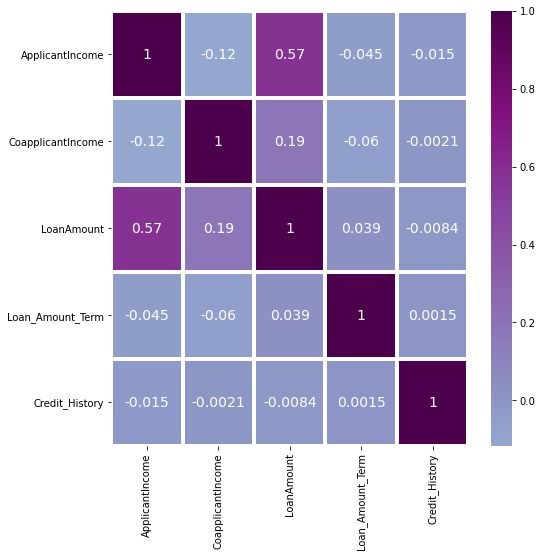

In [21]:
fig,ax = plt.subplots(figsize = (8,8))
sns.heatmap(train.corr(), annot = True, linewidths = 3, cmap = 'BuPu', center = 0,ax=ax, annot_kws={'size':14})

***Target variable***

Loan_Status's counts


,Counts,Proportion
Y,422,0.687296
N,192,0.312704


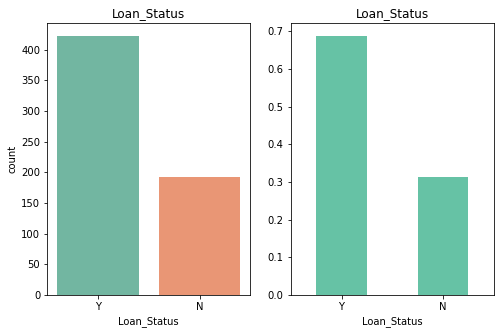

In [22]:
count_var(train, 'Loan_Status')

- 70% of the data have a 'Y' for loan status
- most of the applicant have their loan approved 

***Gender***

Gender's counts


,Counts,Proportion
Male,489,0.813644
Female,112,0.186356


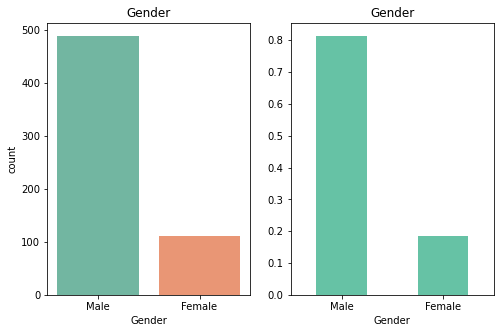

In [23]:
count_var(train,'Gender')

- Most of the applicants are Male (80%)

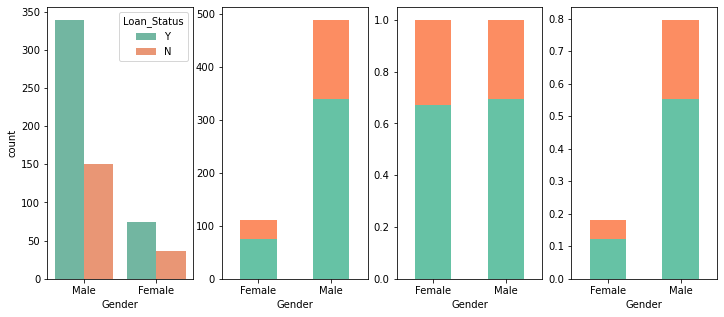

In [24]:
bivariate(train,'Gender','Loan_Status',['Y','N'])

- Although most of the applicant are Male, the loan approved rate for both female and male are mostly the same (65% to 69%)

***Married***

Married's counts


,Counts,Proportion
Yes,398,0.651391
No,213,0.348609


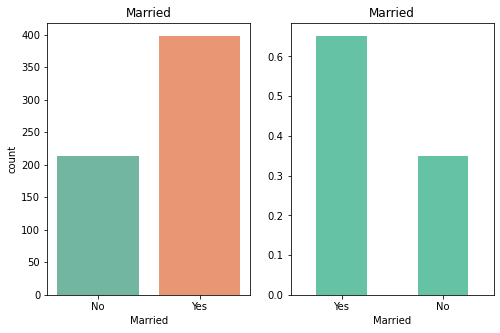

In [25]:
count_var(train,'Married')

- Most of the applicant are married people

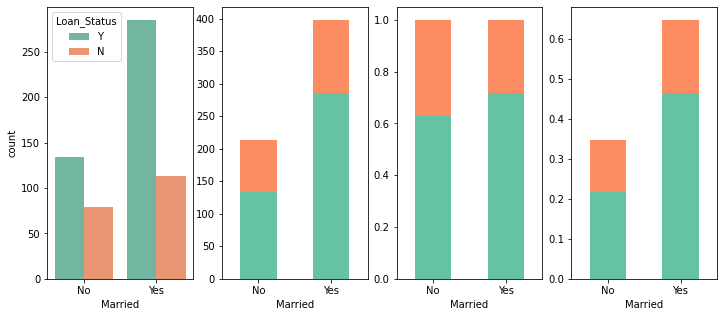

In [26]:
bivariate(train,'Married','Loan_Status',['Y','N'])

- we can see that the married applicant have a slightly higher approving rate (71%)

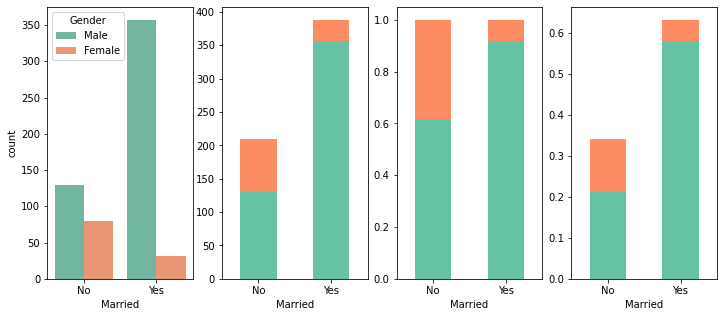

In [27]:
bivariate(train,'Married','Gender',['Male','Female'])

- Most of the applicant are Male married applicant

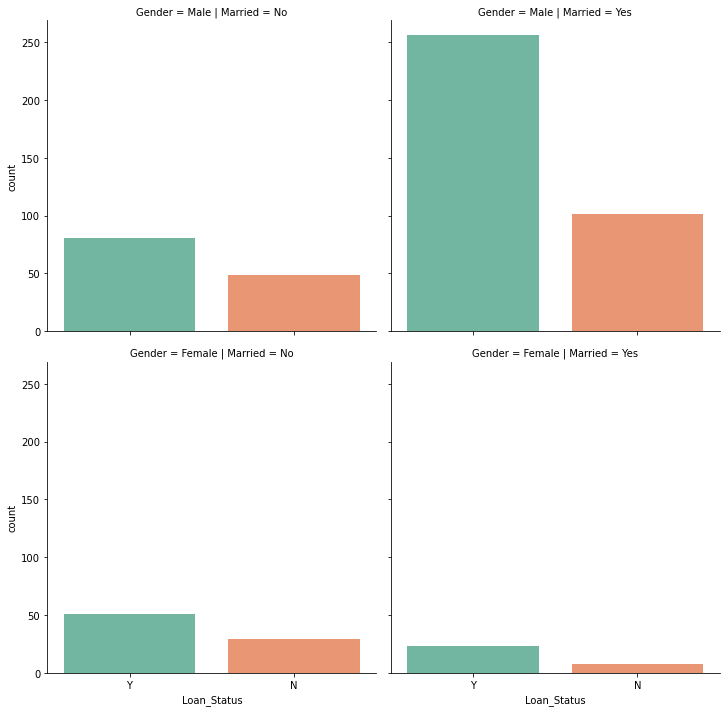

In [28]:
sns.catplot(data = train, x = 'Loan_Status', row = 'Gender', col='Married',kind = 'count')

- Applicant that are Male and married have a highest approving rate

***Dependents***

In [29]:
train.Dependents.replace('3+','3', inplace=True)
test.Dependents.replace('3+','3', inplace=True)

Dependents's counts


,Counts,Proportion
0,345,0.575960
1,102,0.170284
2,101,0.168614
3,51,0.085142


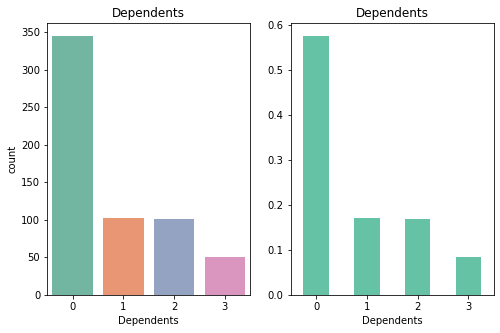

In [30]:
count_var(train,'Dependents')

- Most of the applicant have no dependents ( 58% )

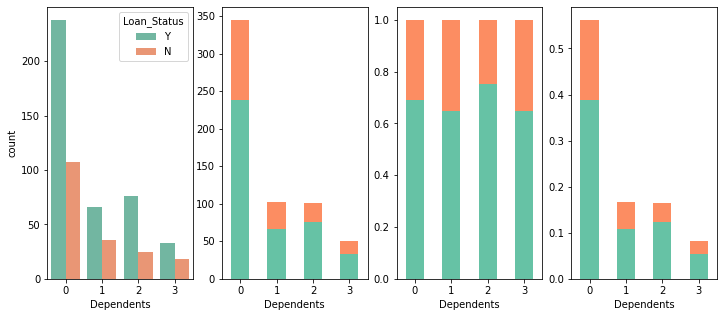

In [31]:
bivariate(train,'Dependents','Loan_Status', ['Y','N'])

- Although applicant with 2 dependents have a higher approving rate but overall the approving rate for each category are approximately the same

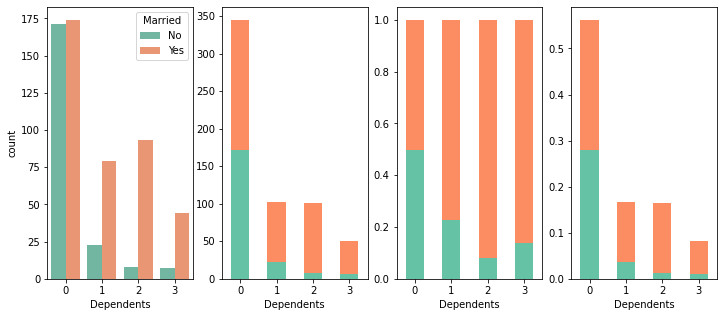

In [32]:
bivariate(train,'Dependents','Married', ['No','Yes'])

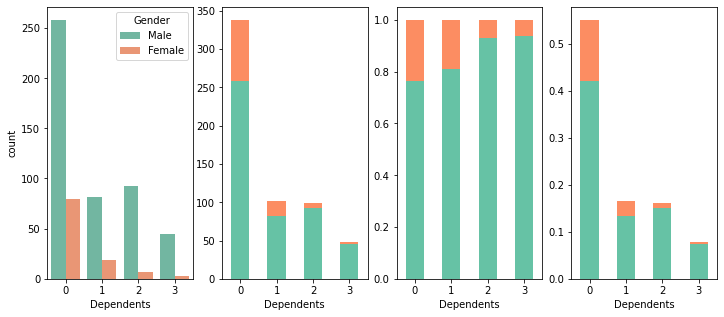

In [33]:
bivariate(train,'Dependents','Gender', ['Male','Female'])

***Education***

Education's counts


,Counts,Proportion
Graduate,480,0.781759
Not Graduate,134,0.218241


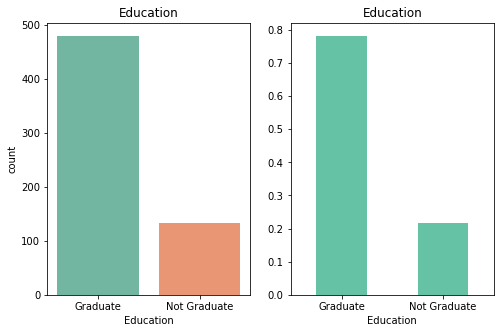

In [34]:
count_var(train,'Education')

- Most of the applicant graduated

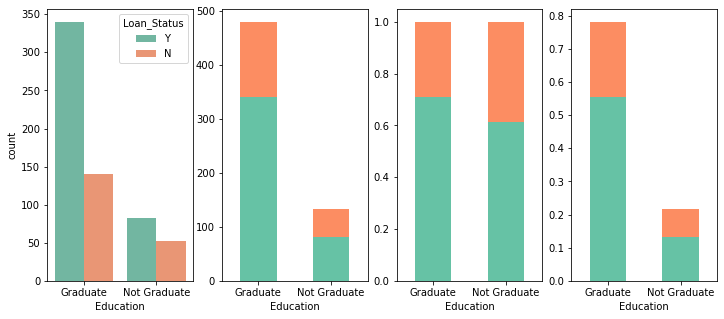

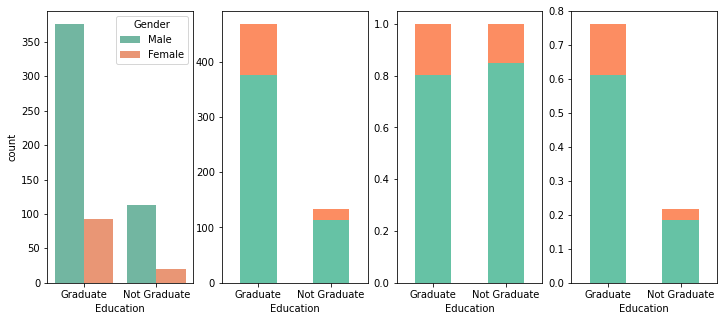

In [35]:
bivariate(train,'Education','Loan_Status',['Y','N'])
bivariate(train,'Education','Gender',['Male','Female'])

- Applicant that are graduated have a slightly higher approving rate

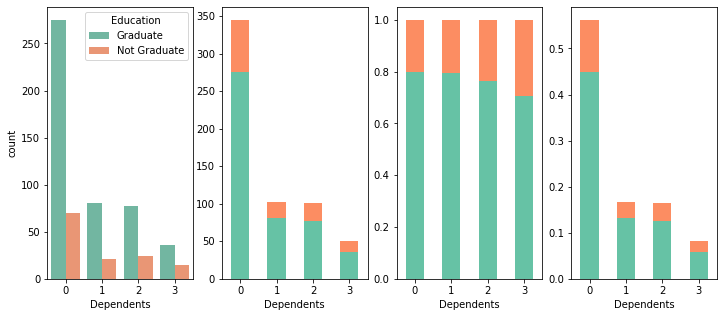

In [36]:
bivariate(train,'Dependents','Education',['Graduate','Not Graduate'])

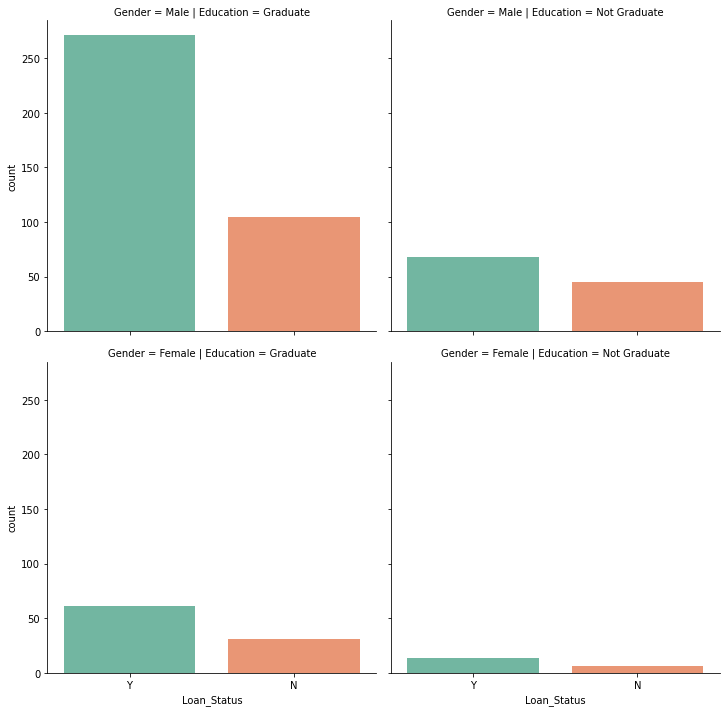

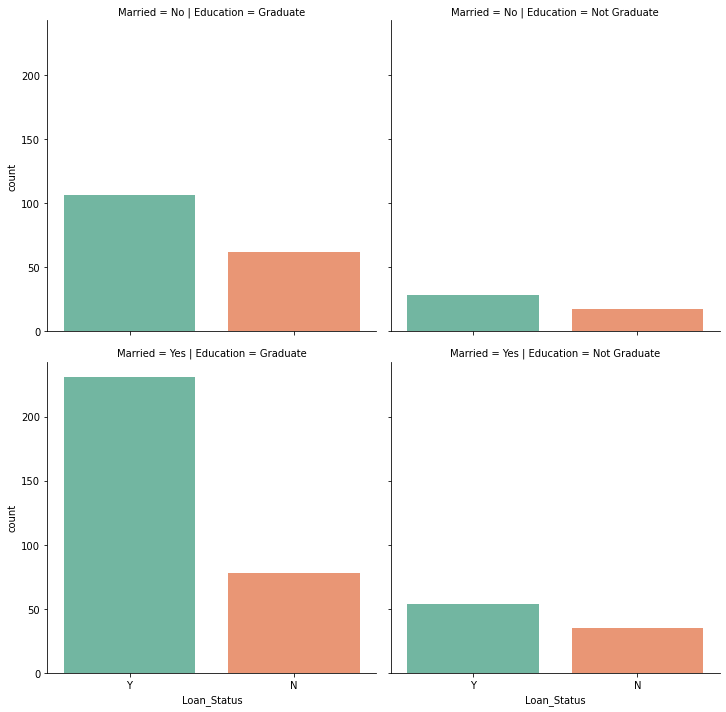

In [37]:
sns.catplot(data = train, x = 'Loan_Status', row = 'Gender', col='Education',kind = 'count')
sns.catplot(data = train, x = 'Loan_Status', row = 'Married', col='Education',kind = 'count')

***Self Employed***

Self_Employed's counts


,Counts,Proportion
No,500,0.859107
Yes,82,0.140893


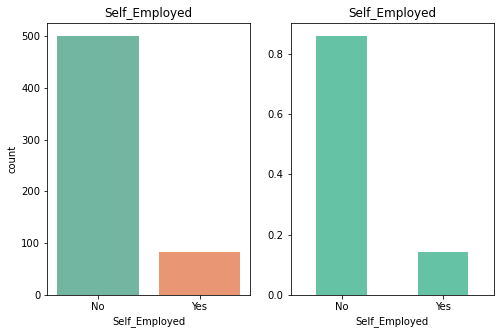

In [38]:
count_var(train,'Self_Employed')

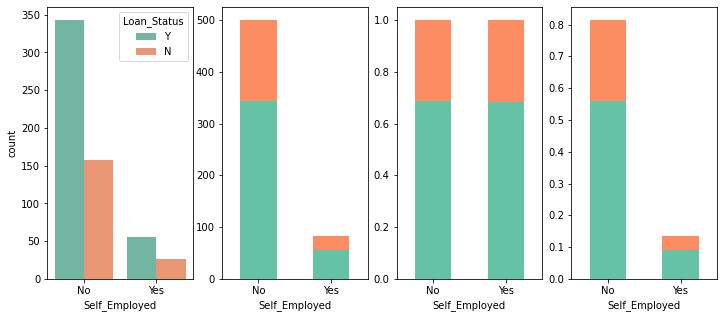

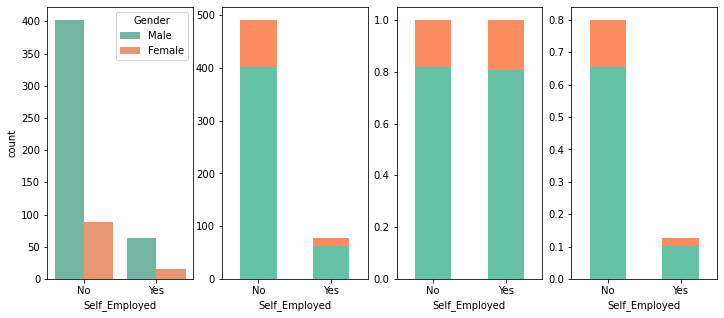

In [39]:
bivariate(train,'Self_Employed','Loan_Status',['Y','N'])
bivariate(train,'Self_Employed','Gender',['Male','Female'])

***Applicant Income***

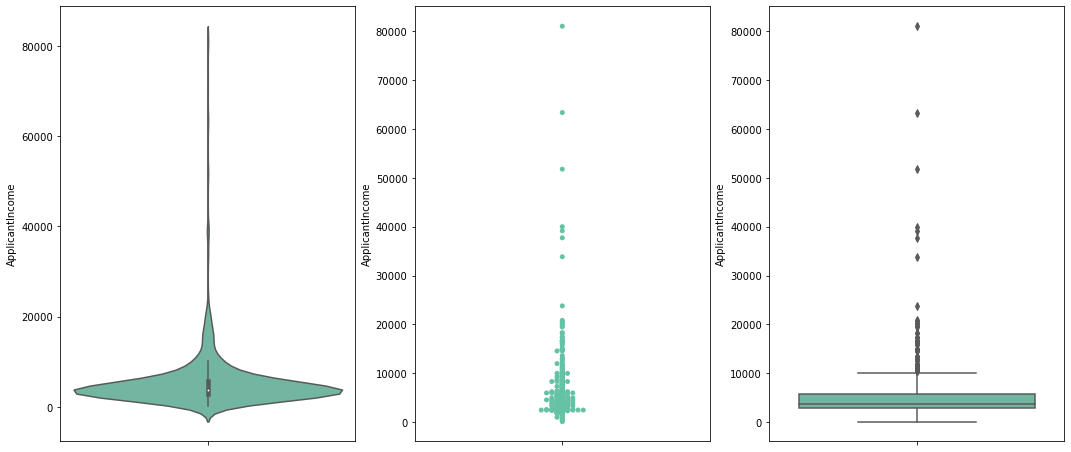

In [40]:
distributions(train,'ApplicantIncome')

In [41]:
display(train.query('ApplicantIncome > 30000').sort_values(by = 'ApplicantIncome',ascending = False))

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,Male,Yes,3,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N
333,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
171,NaN,Yes,3,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
155,Male,Yes,3,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
185,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
443,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y
183,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N


In [42]:
# compute the log of Applicant Income
log_income = np.log10(train.ApplicantIncome.dropna())

[Text(0.5, 0, "Logged's Applicant Income"),
 Text(0.5, 1.0, "Applicant Log's Income")]

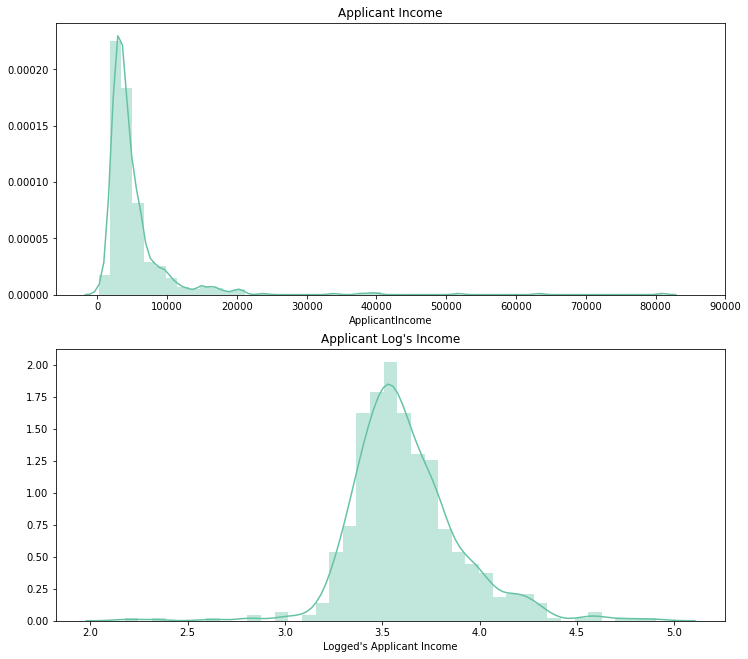

In [43]:
fig = plt.figure(figsize = (12,11))

ax1 = fig.add_subplot(211)
sns.distplot(train.ApplicantIncome.dropna())
ax1.set(title = 'Applicant Income')
plt.xticks(np.arange(0,100000,10000))

ax2 = fig.add_subplot(212)
sns.distplot(log_income)
ax2.set(title = 'Applicant Log\'s Income',xlabel = 'Logged\'s Applicant Income')

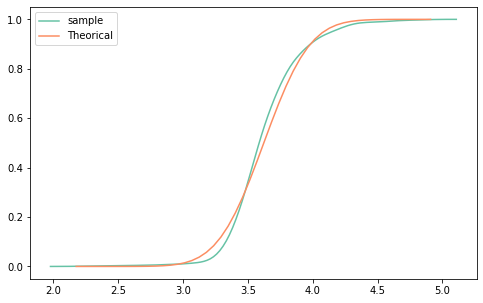

In [44]:
fig,ax = plt.subplots(figsize = (8,5))
# plot the sample data distribution 
sns.kdeplot(log_income, cumulative=True, label = 'sample',ax=ax)

# plot theorical normal distributions 
from scipy.stats import norm
x = np.linspace(log_income.min(),log_income.max())
y = norm(log_income.mean(),log_income.std()).cdf(x)
ax.plot(x,y, label = 'Theorical')
plt.legend()

ApplicantIncome by Loan_Status


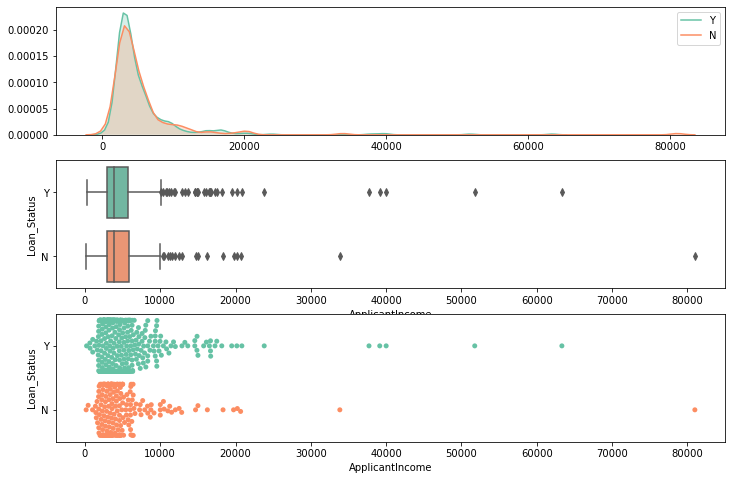

In [45]:
numerical(train,'ApplicantIncome','Loan_Status')

- We can see that for both categories in Loan Status the applicant income have similiar quantile and range but 'Y' has more outliers

ApplicantIncome by Gender


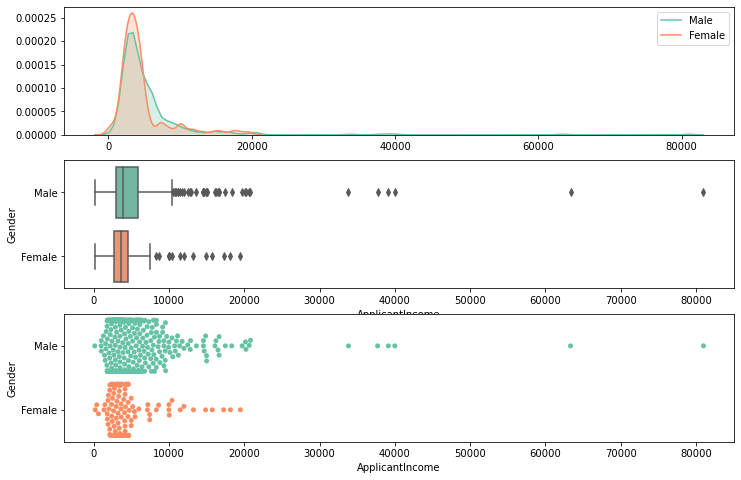

In [46]:
numerical(train,'ApplicantIncome','Gender')

- The range of Male applicant income is bigger and more outliers

ApplicantIncome by Self_Employed


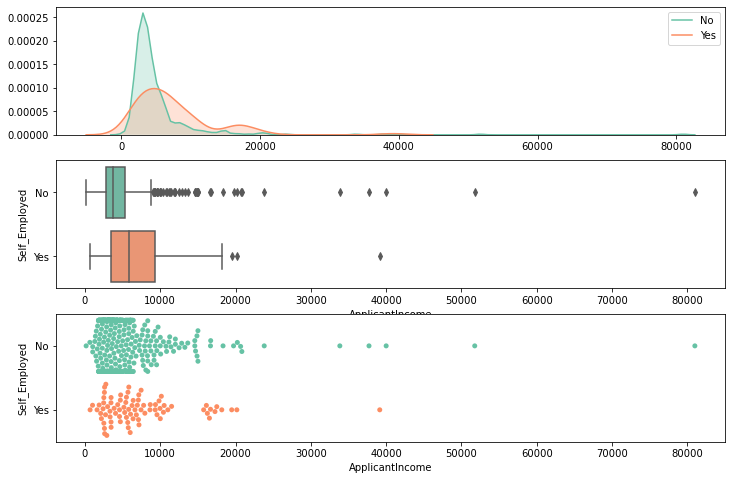

In [47]:
numerical(train,'ApplicantIncome','Self_Employed')

,mean,median
Loan_Status,,
N,5446.078125,3833.5
Y,5384.068720,3812.5


,mean,median
Education,,
Graduate,5857.433333,4000.0
Not Graduate,3777.283582,3357.5


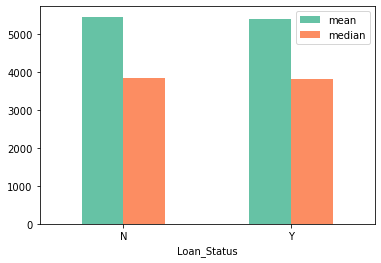

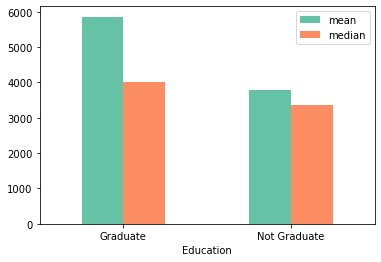

In [48]:
num_cat(train,'ApplicantIncome','Loan_Status')
num_cat(train,'ApplicantIncome','Education')

- Self-employed applicant's income have a bigger range and higher median 
- Self-employed applicants have higher income
- Male applicant has higher income than female

***Coapplicant Income***

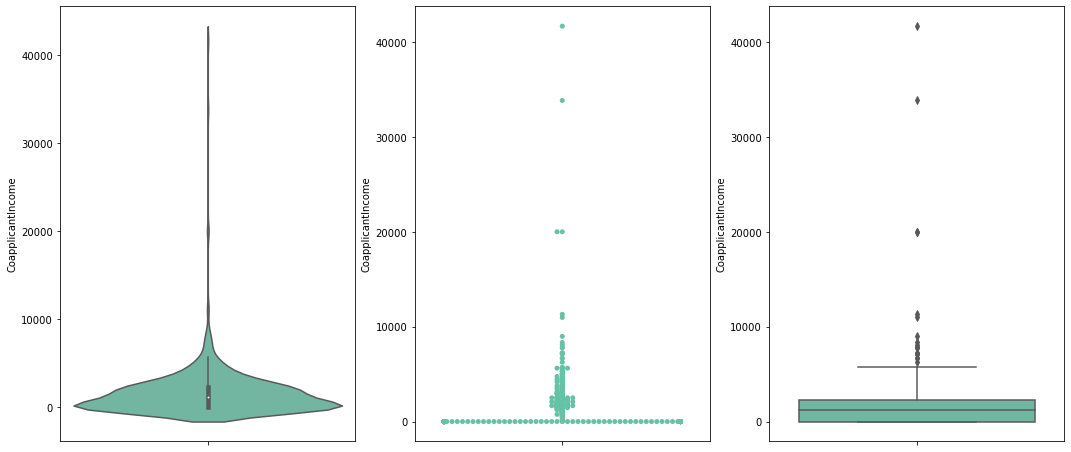

In [49]:
distributions(train,'CoapplicantIncome')

([<matplotlib.axis.XTick at 0x7fa6651e3310>,
 <a list of 5 Text major ticklabel objects>)

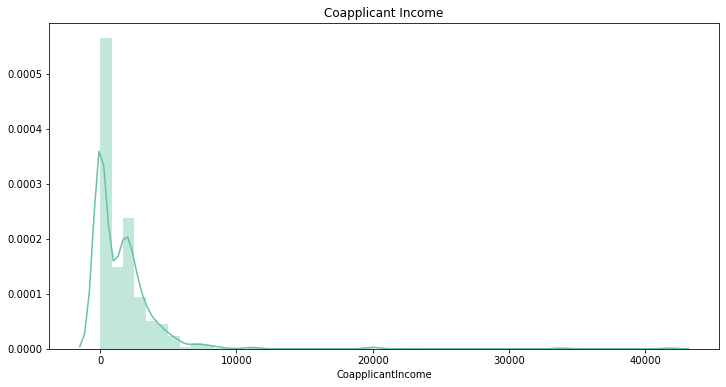

In [50]:
fig = plt.figure(figsize = (12,6))

ax1 = fig.add_subplot(111)
sns.distplot(train.CoapplicantIncome.dropna())
ax1.set(title = 'Coapplicant Income')
plt.xticks(np.arange(0,train.CoapplicantIncome.max() + 5000,10000))

In [51]:
display(train.groupby('Self_Employed')['CoapplicantIncome'].agg(['mean','median']))
display(train.groupby('Loan_Status')['CoapplicantIncome'].agg(['mean','median']))
display(train.groupby('Gender')['CoapplicantIncome'].agg(['mean','median']))

,mean,median
Self_Employed,,
No,1580.989840,1293.5
Yes,1501.341463,0.0


,mean,median
Loan_Status,,
N,1877.807292,268.0
Y,1504.516398,1239.5


,mean,median
Gender,,
Female,1108.008929,0.0
Male,1742.932352,1430.0


CoapplicantIncome by Loan_Status


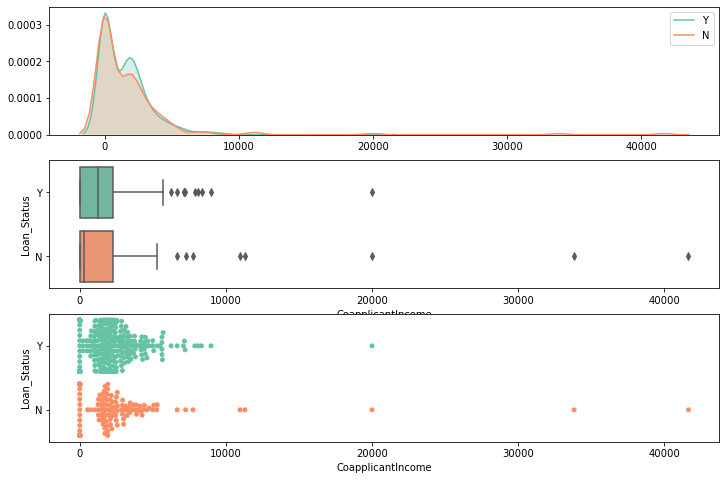

In [52]:
numerical(train,'CoapplicantIncome','Loan_Status')

CoapplicantIncome by Gender


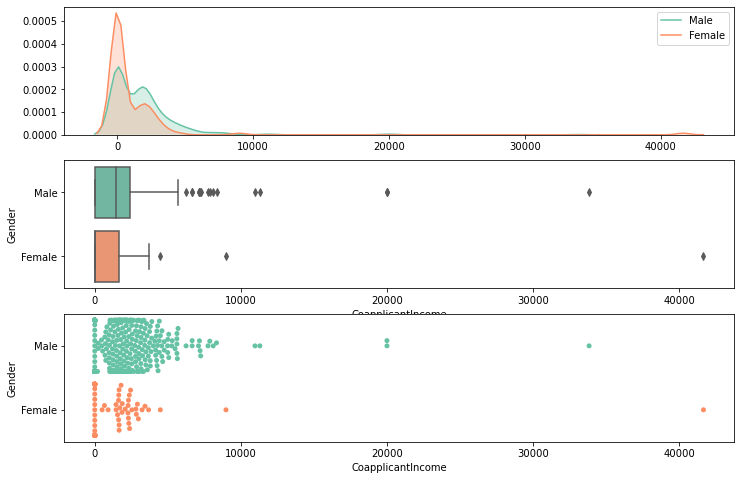

In [53]:
numerical(train,'CoapplicantIncome','Gender')

CoapplicantIncome by Dependents


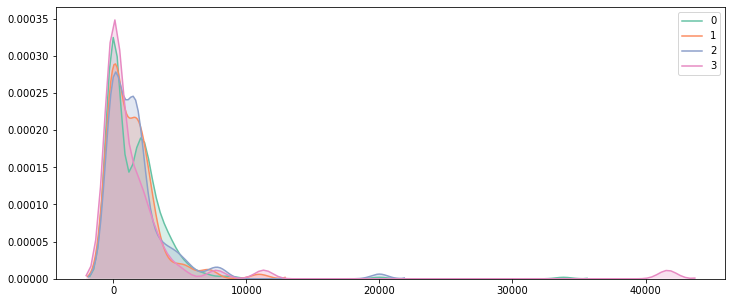

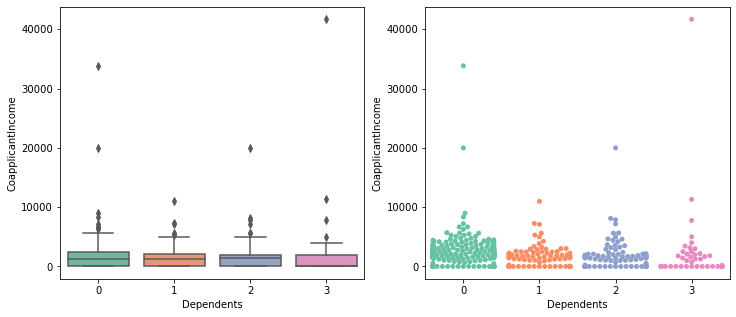

In [54]:
numerical(train,'CoapplicantIncome','Dependents',2)

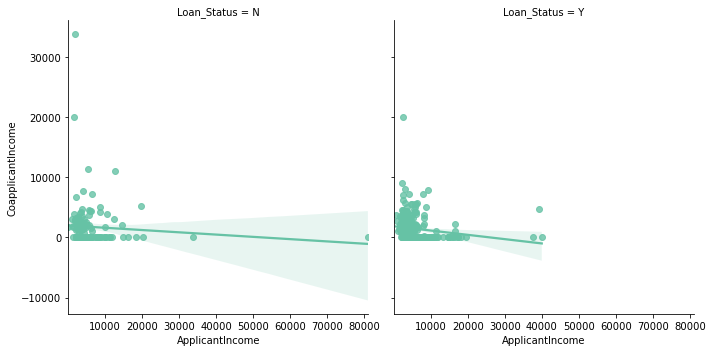

In [55]:
sns.lmplot(data = train.dropna(), x = 'ApplicantIncome',y = 'CoapplicantIncome',col = 'Loan_Status')

- Seems like for approved loan the applicant Income and Coapplicant Income have lesser outliers

***Total Income***

In [56]:
train['Total_Income'] = train.ApplicantIncome + train.CoapplicantIncome
test['Total_Income'] = test.ApplicantIncome + test.CoapplicantIncome

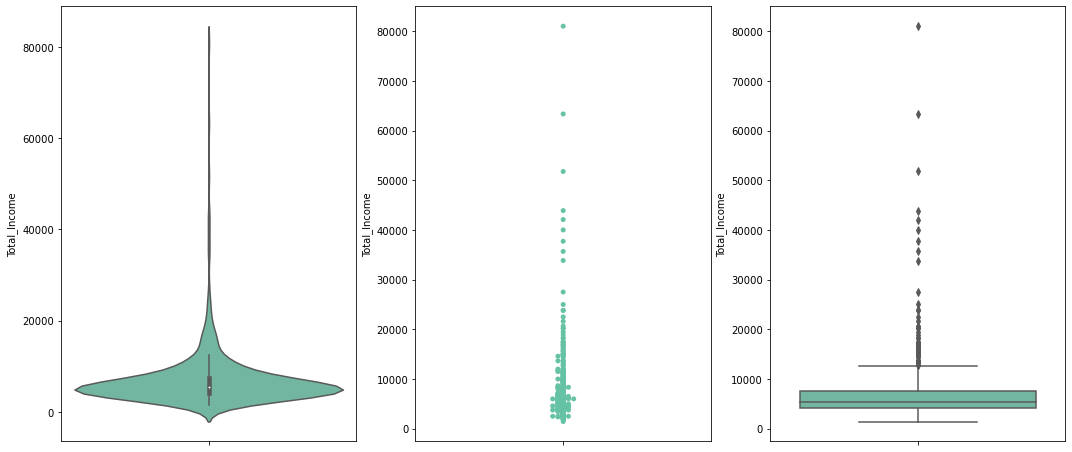

In [57]:
distributions(train,'Total_Income')

In [58]:
# compute the log of Applicant Income
log_total = np.log10(train.Total_Income.dropna())

Total_Income by Loan_Status


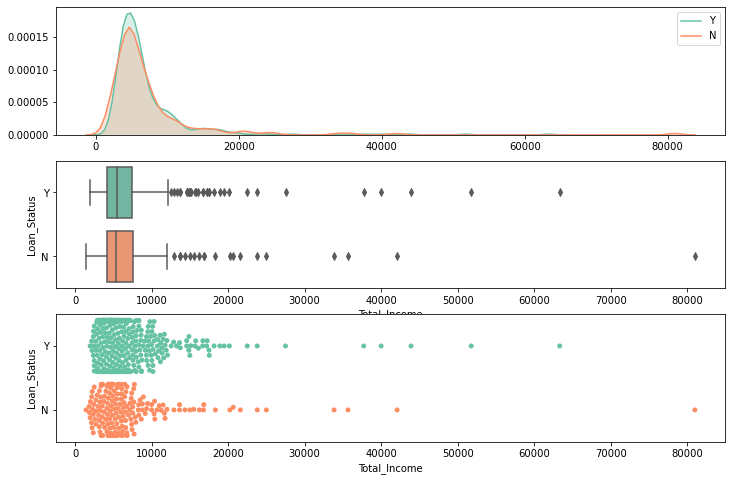

In [59]:
numerical(train,'Total_Income','Loan_Status')

[Text(0.5, 0, "Logged's total Income"), Text(0.5, 1.0, "Total Log's Income")]

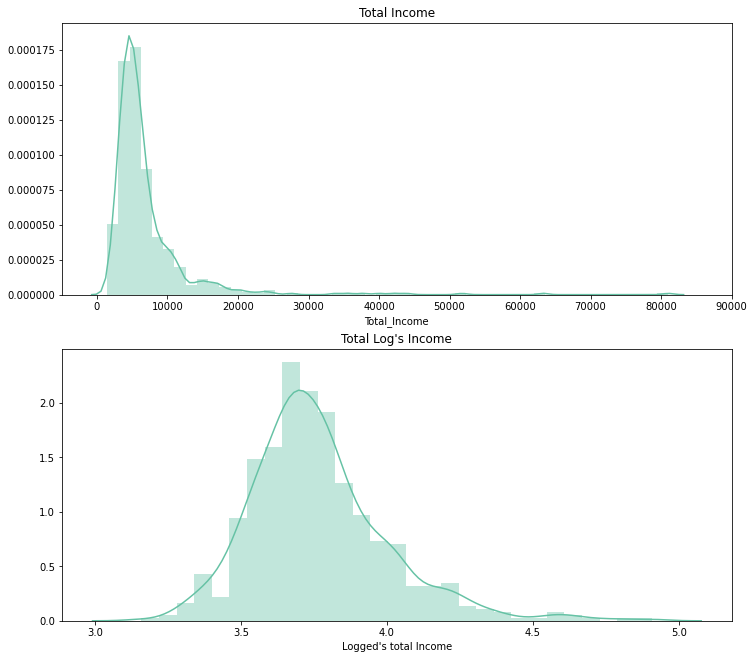

In [60]:
fig = plt.figure(figsize = (12,11))

ax1 = fig.add_subplot(211)
sns.distplot(train.Total_Income.dropna())
ax1.set(title = 'Total Income')
plt.xticks(np.arange(0,100000,10000))

ax2 = fig.add_subplot(212)
sns.distplot(log_total)
ax2.set(title = 'Total Log\'s Income',xlabel = 'Logged\'s total Income')

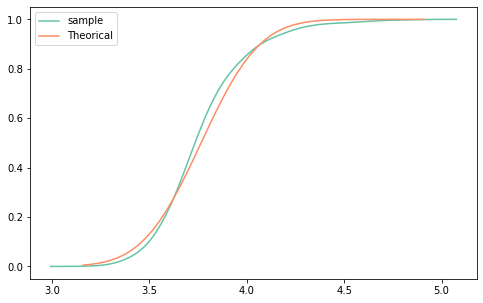

In [61]:
fig,ax = plt.subplots(figsize = (8,5))
# plot the sample data distribution 
sns.kdeplot(log_total, cumulative=True, label = 'sample',ax=ax)

# plot theorical normal distributions 
from scipy.stats import norm
x = np.linspace(log_total.min(),log_total.max())
y = norm(log_total.mean(),log_total.std()).cdf(x)
ax.plot(x,y, label = 'Theorical')
plt.legend()

,mean,median
Self_Employed,,
No,6630.737840,5183.5
Yes,8882.158537,7062.5


,mean,median
Loan_Status,,
N,7323.885417,5289.5
Y,6888.585118,5439.0


,mean,median
Gender,,
Female,5751.482143,4296.0
Male,7189.392474,5666.0


Total_Income by Loan_Status
Total_Income by Gender


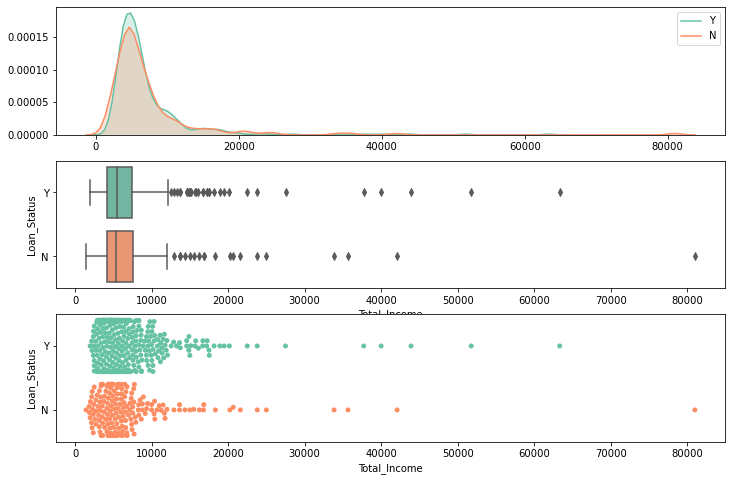

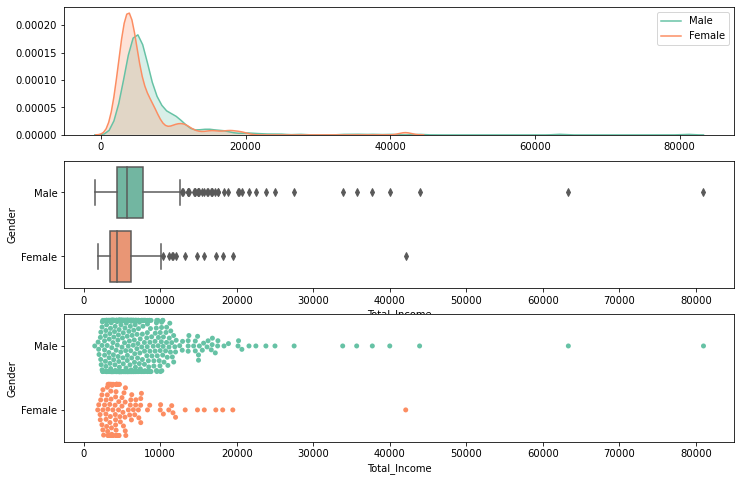

In [62]:
display(train.groupby('Self_Employed')['Total_Income'].agg(['mean','median']))
display(train.groupby('Loan_Status')['Total_Income'].agg(['mean','median']))
display(train.groupby('Gender')['Total_Income'].agg(['mean','median']))

numerical(train,'Total_Income','Loan_Status')
numerical(train,'Total_Income','Gender')

In [63]:
train['income_cat'] = pd.qcut(train.Total_Income,4,labels = ['low','medium','high','very high'])
test['income_cat'] = pd.qcut(test.Total_Income,4,labels = ['low','medium','high','very high'])

Total_Income by income_cat


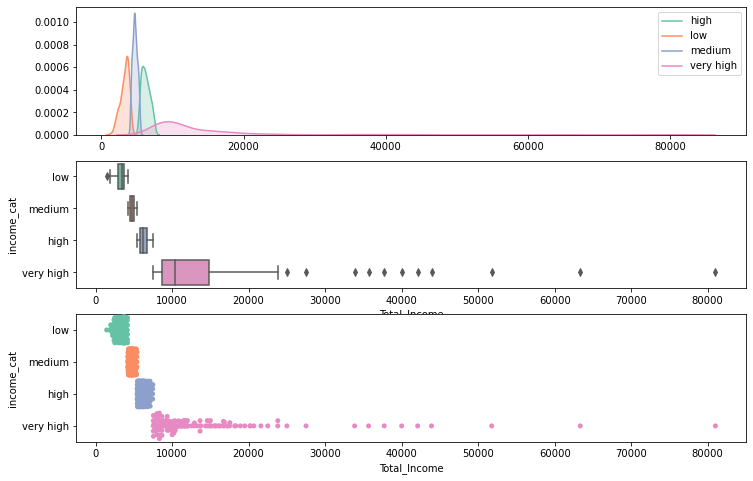

In [64]:
numerical(train,'Total_Income','income_cat')

income_cat's counts


,Counts,Proportion
low,155,0.252443
very high,154,0.250814
high,153,0.249186
medium,152,0.247557


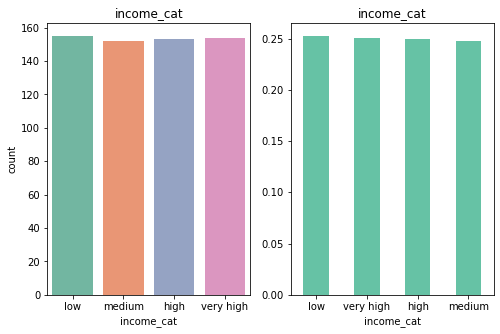

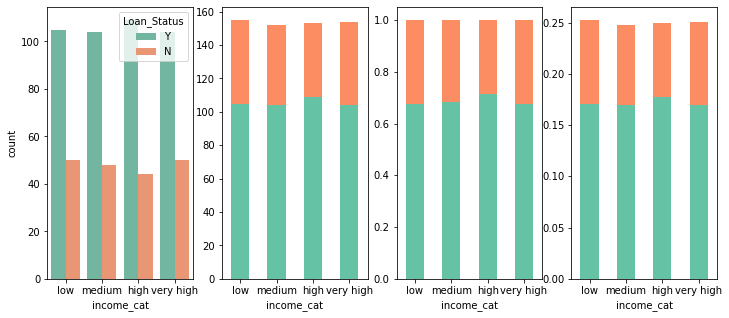

In [65]:
count_var(train,'income_cat')
bivariate(train,'income_cat','Loan_Status',['Y','N'])

***Loan Amount***

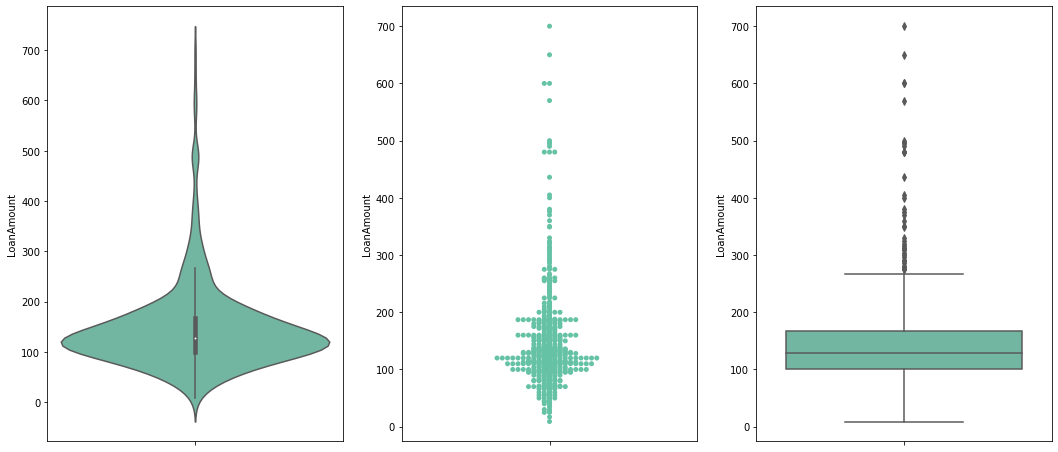

In [66]:
distributions(train,'LoanAmount')

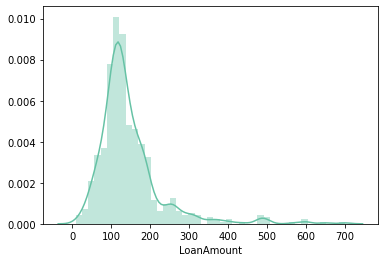

In [67]:
sns.distplot(train.LoanAmount.dropna())

LoanAmount by Loan_Status


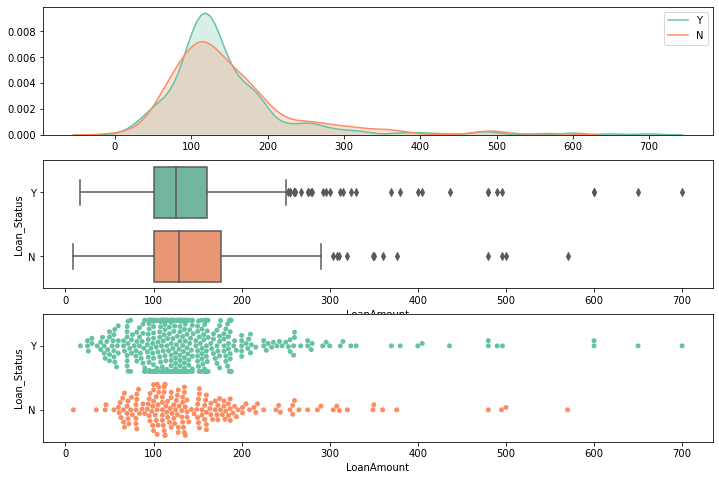

In [68]:
numerical(train,'LoanAmount','Loan_Status')

- LoanAmount for approving loan tend to skew left more and the range also shorter
- the lower the loan amoun the higher the probability approve?

LoanAmount by Gender


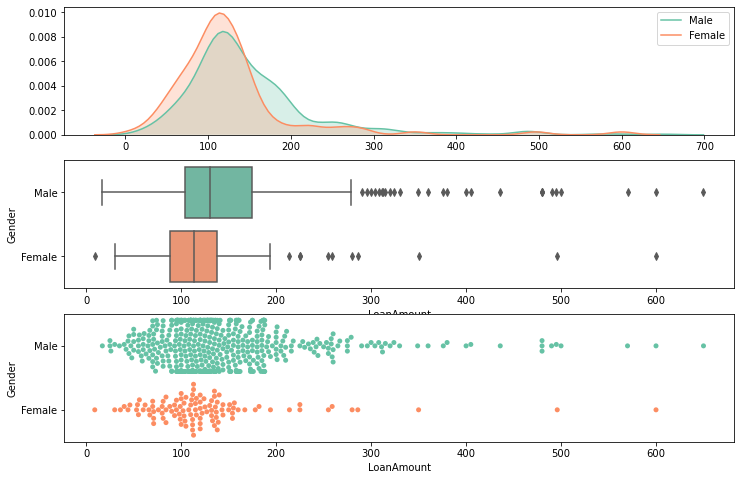

In [69]:
numerical(train,'LoanAmount','Gender')

LoanAmount by Education


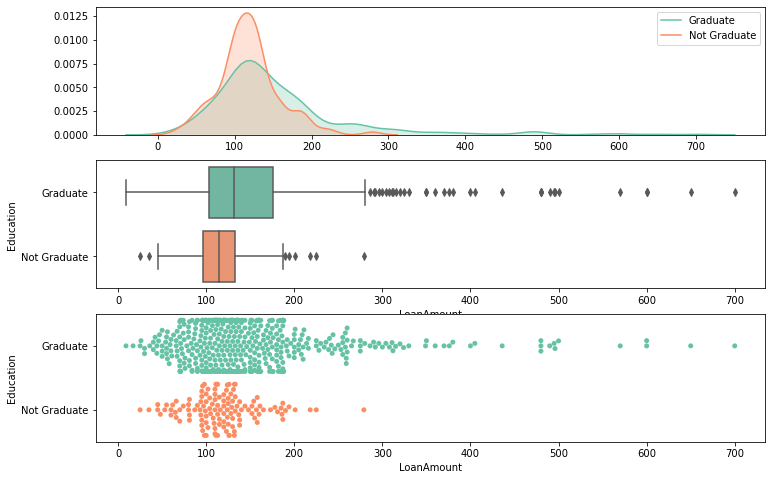

In [70]:
numerical(train,'LoanAmount','Education')

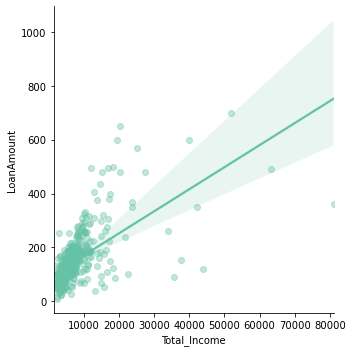

In [71]:
sns.lmplot(data = train, x = 'Total_Income', y = 'LoanAmount', scatter_kws={'alpha' : 0.4})

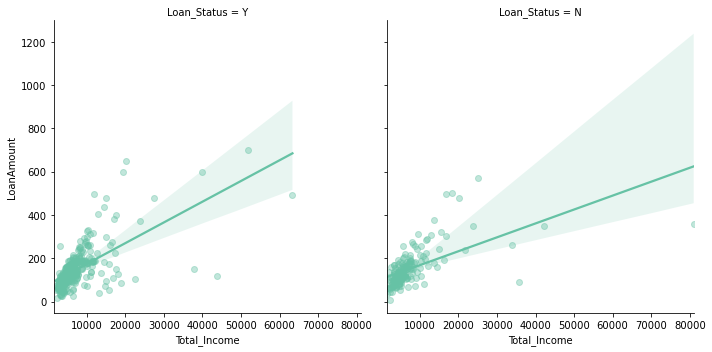

In [72]:
sns.lmplot(data = train, x = 'Total_Income', y = 'LoanAmount', scatter_kws={'alpha' : 0.4},col = 'Loan_Status')

In [73]:
train['LoanAmount_cat'] = pd.qcut(train.LoanAmount,4,labels = ['low','medium','high','very high'])
test['LoanAmount_cat'] = pd.qcut(test.LoanAmount,4,labels = ['low','medium','high','very high'])

LoanAmount_cat's counts


,Counts,Proportion
low,154,0.260135
medium,152,0.256757
very high,146,0.246622
high,140,0.236486


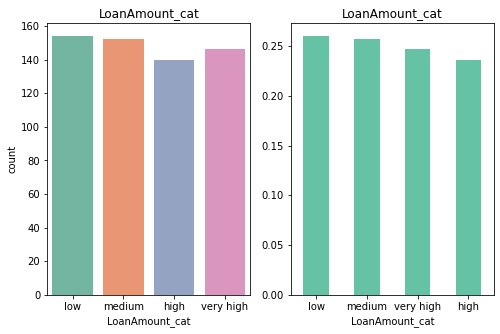

In [74]:
count_var(train,'LoanAmount_cat')

LoanAmount by LoanAmount_cat


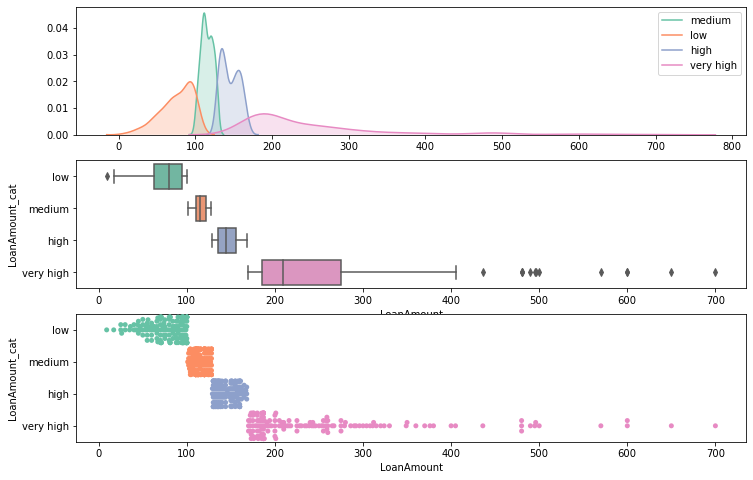

In [75]:
numerical(train,'LoanAmount','LoanAmount_cat')

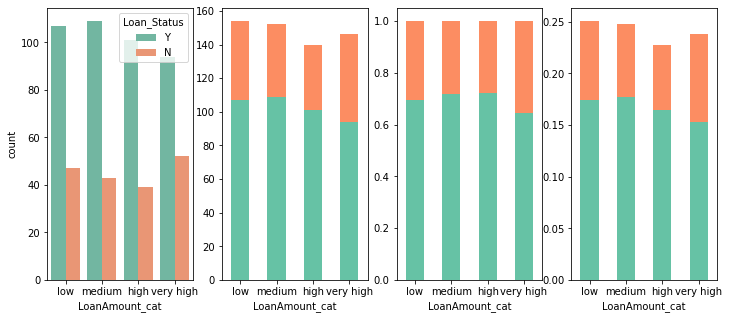

In [76]:
bivariate(train,'LoanAmount_cat','Loan_Status',['Y','N'])

***Loan Amount Term***

Loan_Amount_Term's counts


,Counts,Proportion
360.0,512,0.853333
180.0,44,0.073333
480.0,15,0.025000
300.0,13,0.021667
84.0,4,0.006667
240.0,4,0.006667
120.0,3,0.005000
36.0,2,0.003333
60.0,2,0.003333
12.0,1,0.001667


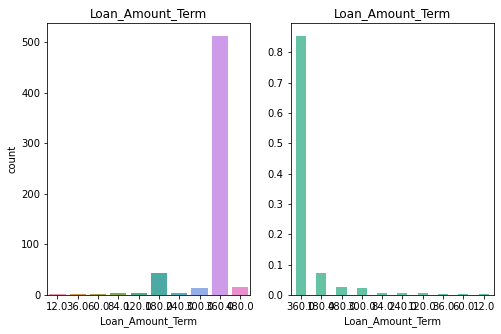

In [77]:
count_var(train,'Loan_Amount_Term')

***EMI***

In [78]:
train['EMI'] = (train.LoanAmount * 1000) / train.Loan_Amount_Term
test['EMI'] = (test.LoanAmount * 1000) / test.Loan_Amount_Term

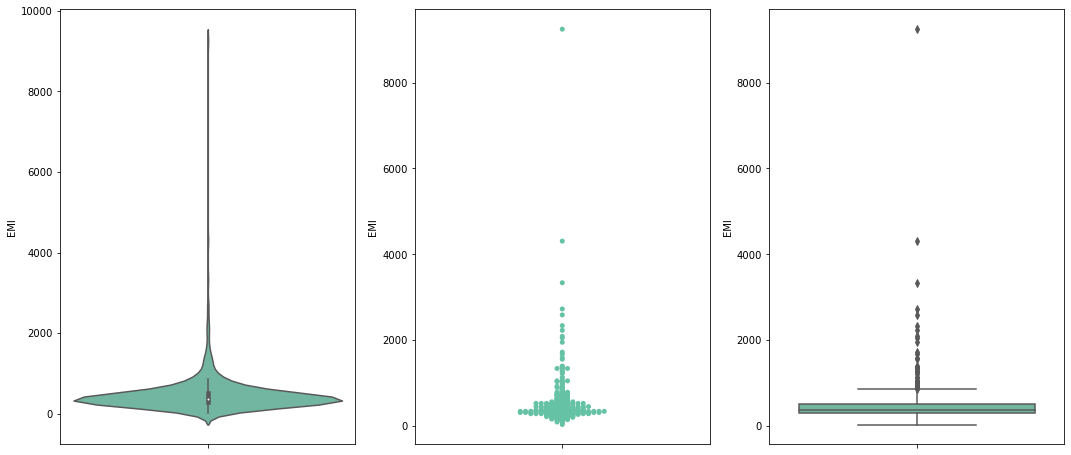

In [79]:
distributions(train,'EMI')

EMI by Loan_Status


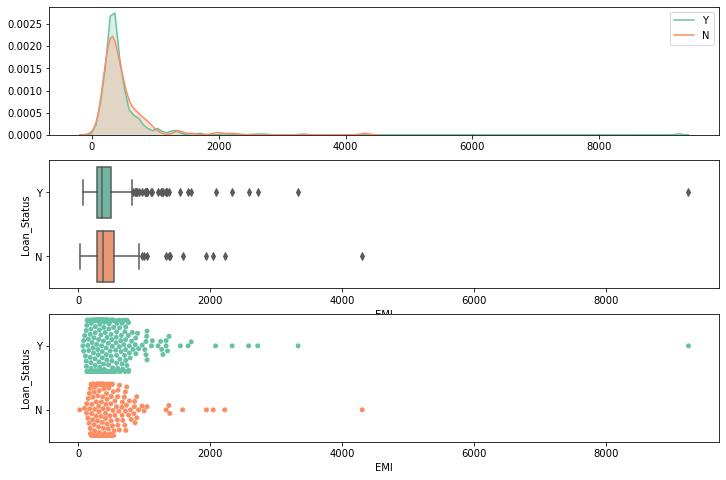

In [80]:
numerical(train,'EMI','Loan_Status')

In [81]:
display(train.groupby('Self_Employed')['EMI'].agg(['mean','median']))
display(train.groupby('Loan_Status')['EMI'].agg(['mean','median']))
display(train.groupby('Gender')['EMI'].agg(['mean','median']))

,mean,median
Self_Employed,,
No,465.172505,361.111111
Yes,556.318285,438.888889


,mean,median
Loan_Status,,
N,492.564172,375.000000
Y,474.974152,361.111111


,mean,median
Gender,,
Female,412.940252,314.236111
Male,491.103806,375.000000


***Credit History***

Credit_History's counts


,Counts,Proportion
1.0,475,0.842199
0.0,89,0.157801


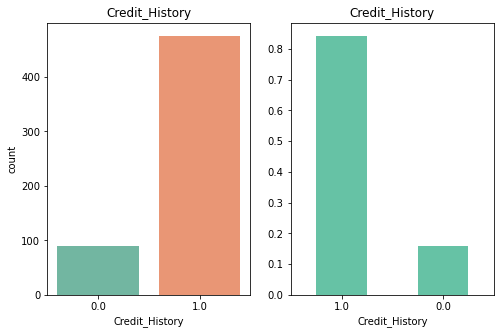

In [82]:
count_var(train,'Credit_History')

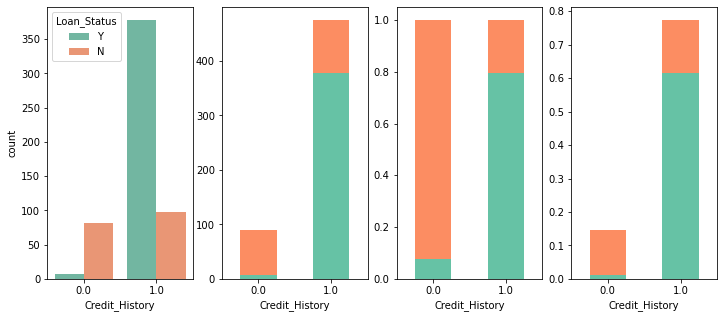

In [83]:
bivariate(train,'Credit_History','Loan_Status',['Y','N'])

***Property Area***

Property_Area's counts


,Counts,Proportion
Semiurban,233,0.379479
Urban,202,0.328990
Rural,179,0.291531


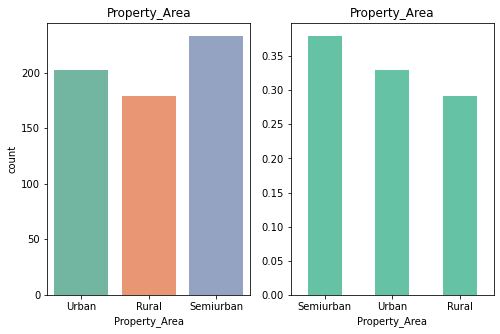

In [84]:
count_var(train,'Property_Area')

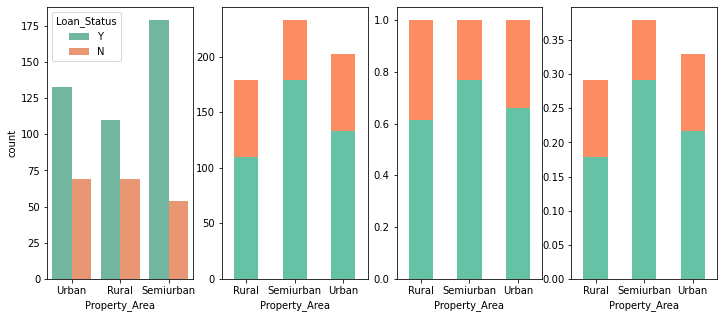

In [85]:
bivariate(train,'Property_Area','Loan_Status',['Y','N'])

# Deal with missing values

In [86]:
check_na()

,Type,Train,Train pct,Test,Test pct
Gender,object,13,2.117264,11.0,2.997275
Married,object,3,0.488599,0.0,0.000000
Dependents,object,15,2.442997,10.0,2.724796
Education,object,0,0.000000,0.0,0.000000
Self_Employed,object,32,5.211726,23.0,6.267030
ApplicantIncome,int64,0,0.000000,0.0,0.000000
CoapplicantIncome,float64,0,0.000000,0.0,0.000000
LoanAmount,float64,22,3.583062,5.0,1.362398
Loan_Amount_Term,float64,14,2.280130,6.0,1.634877
Credit_History,float64,50,8.143322,29.0,7.901907


In [87]:
train.EMI.fillna(train.EMI.median(),inplace = True)

In [88]:
imputer(train)
imputer(test)

In [89]:
check_na()

,Type,Train,Train pct,Test,Test pct
Gender,object,0,0.0,0.0,0.0
Married,object,0,0.0,0.0,0.0
Dependents,object,0,0.0,0.0,0.0
Education,object,0,0.0,0.0,0.0
Self_Employed,object,0,0.0,0.0,0.0
ApplicantIncome,int64,0,0.0,0.0,0.0
CoapplicantIncome,float64,0,0.0,0.0,0.0
LoanAmount,float64,0,0.0,0.0,0.0
Loan_Amount_Term,float64,0,0.0,0.0,0.0
Credit_History,float64,0,0.0,0.0,0.0


***Outliers***

In [90]:
train.shape

(614, 16)

In [92]:
num = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Total_Income', 'EMI']
for col in num:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3-Q1
    train = train[~((train[col] < (Q1 - 1.5 * IQR))| (train[col] > (Q3 + 1.5 * IQR)))]

In [93]:
train.shape

(475, 16)

In [94]:
y = train.Loan_Status
X = train.drop('Loan_Status',axis = 1)

# Inplement Model

In [95]:
# import libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

seed = 225

# Trying every algorithm

In [187]:
def model_testing(X,y,models,num_cols,cat_cols,scale = True):
    '''Pipeline for data preprocessing and try every models.
    Args:
        X (df / arrays) : features
        y (df / arrays / series) : labels ( targets )
        num_cols (list) : list of numerical columns
        cat_cols (list) : list of categorical columns
        scale = True : Whether to scale the features or not
        '''
    # initiate lists
    score_name = []
    train_score = []
    train_score_scaled = []
    test_score = []
    test_score_scaled = []
    
    # pipeline for preprocessing
    cat_transformer = Pipeline(steps = [('OneHotEncoder',OneHotEncoder(handle_unknown = 'ignore'))])
    
    
    if scale == True:
        num_transformer = Pipeline(steps = [('scaler',StandardScaler())])
    else:
        num_transformer = Pipeline()
        
    preprocessor = ColumnTransformer(transformers = [('num', num_transformer, num_cols), ('cat',cat_transformer, cat_cols)])

    # pipeline for modeling
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = seed)

    for name,model in models.items():
        pipeline = Pipeline(steps = [('Preprocessor',preprocessor),(name, model)])
        pipeline.fit(X_train,y_train)
        score_name.append(name)
        train_score.append(pipeline.score(X_train,y_train))
        test_score.append(pipeline.score(X_test,y_test))
    
    # df that show train score and test score for each model
    df_score = pd.DataFrame({'Model':score_name,'train_score':train_score,'test_score':test_score})
    df_score.set_index('Model',inplace = True)
    display(df_score)
    
def output_csv(name,X,model):
    '''Generate prediction and output into csv.
    Args:
        name (str) : name of output file
        X (df / arrays) : features
        model (algorithm) : model to implement'''
    predict = model.predict(X)
    df_test['Loan_Status'] = predict
    output = df_test[['Loan_ID','Loan_Status']]
    try:
        output.to_csv(name,index = False)
        print('Output file {} sucessfully.'.format(name))
    except:
        print('Ouput unsucessfully.')

In [174]:
# possible algorithms
model_dict = {'KNN': KNN(),
              'XG':XGBClassifier(random_state=seed),
              'DT':DecisionTreeClassifier(random_state=seed),
              'RF':RandomForestClassifier(random_state=seed),
              'AB':AdaBoostClassifier(DecisionTreeClassifier(random_state=seed),random_state=seed),
             'GB':GradientBoostingClassifier(random_state=seed),
             'LR':LogisticRegression(random_state=seed),
             'SGD':SGDClassifier(random_state=seed),
             'LinearSVC':LinearSVC(random_state=seed),
             'SVC':SVC(random_state=seed)}

**Using total income**

In [175]:
num_cols = ['Total_Income','EMI']
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

model_testing(X,y,model_dict,num_cols,cat_cols)

,train_score,test_score
Model,,
KNN,0.816265,0.769231
XG,1.000000,0.804196
DT,1.000000,0.748252
RF,1.000000,0.825175
AB,1.000000,0.769231
GB,0.927711,0.797203
LR,0.822289,0.839161
SGD,0.740964,0.657343
LinearSVC,0.822289,0.839161


# Feature enginerring

In [171]:
train['total_income_log'] = np.log10(train.Total_Income)
test['total_income_log'] = np.log10(test.Total_Income)
X = train.drop('Loan_Status',axis = 1)

**Using log total income**

In [172]:
num_cols = ['total_income_log','EMI']
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

model_testing(X,y,model_dict,num_cols,cat_cols)

,train_score,test_score
Model,,
KNN,0.813253,0.755245
XG,1.000000,0.804196
DT,1.000000,0.748252
RF,1.000000,0.825175
AB,1.000000,0.769231
GB,0.927711,0.797203
LR,0.825301,0.832168
SGD,0.804217,0.832168
LinearSVC,0.822289,0.839161


# Feature importances

In [102]:
cols_chosen = ['total_income_log','EMI','Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

In [103]:
# Logistic regression
X = train[cols_chosen]
X = pd.get_dummies(X)

In [104]:
def feature_importances(X,y,model,seed, title ,feature = True):
    model = model
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = seed)
    model.fit(X_train,y_train)
    if feature == True:
        importances = model.feature_importances_
    else:
        importances = model.coef_[0]
    fig,ax = plt.subplots(figsize = (8,6))
    ax.barh(X.columns,importances )
    ax.set(title = title, ylabel = 'Features')
    print('Test score : {}'.format(model.score(X_test,y_test)))

Test score : 0.8041958041958042


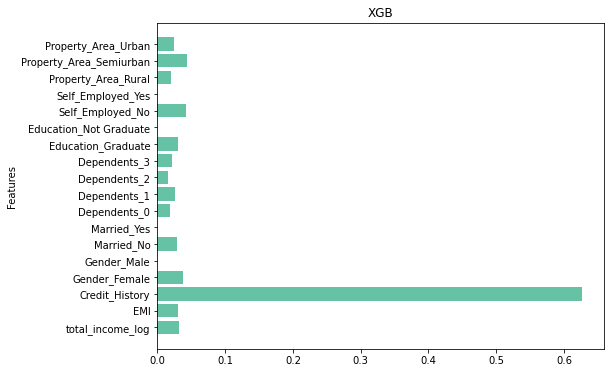

In [105]:
feature_importances(X,y,XGBClassifier(random_state = seed),seed, 'XGB')

Test score : 0.8041958041958042


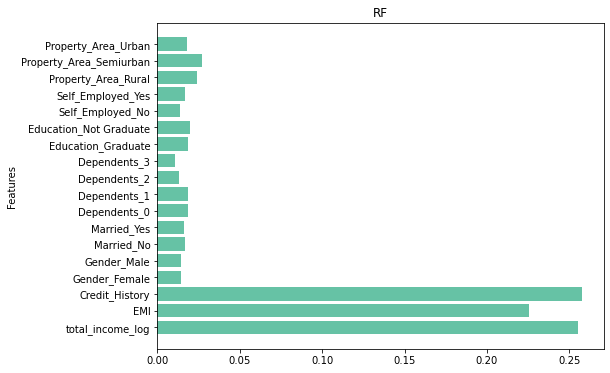

In [106]:
feature_importances(X,y,RandomForestClassifier(random_state = seed),seed,'RF')

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Test score : 0.8391608391608392


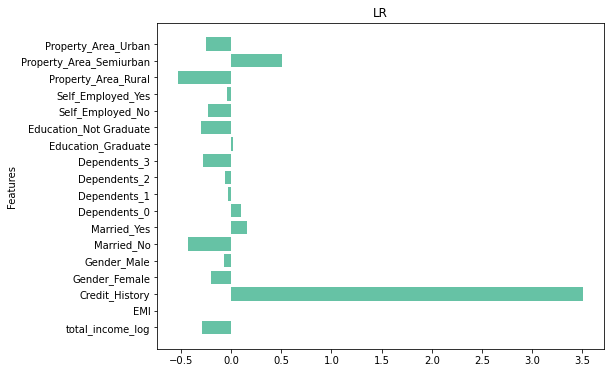

In [107]:
feature_importances(X,y,LogisticRegression(),seed,'LR',False)

Test score : 0.7202797202797203


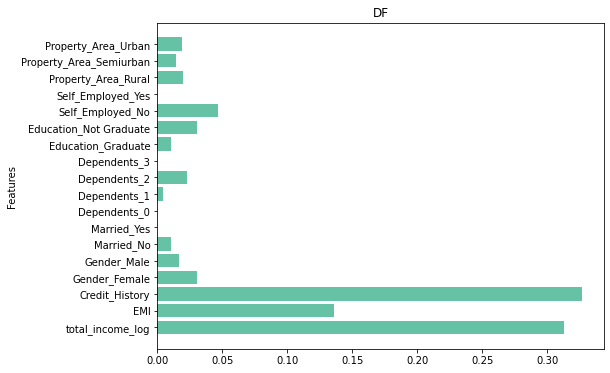

In [108]:
feature_importances(X,y,DecisionTreeClassifier(random_state = seed),seed,'DF')

# Hyperparameter tuning

In [182]:
model_final = {'RF':RandomForestClassifier(random_state=seed), 'XG':XGBClassifier(random_state = seed),'LR':LogisticRegression()}
final_score = []

**Random Forest**

In [183]:
cols_chosen = ['total_income_log','EMI','Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
X = pd.get_dummies(train[cols_chosen])
y = train.Loan_Status

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = seed)

model = model_final['RF']
params = {'max_depth' : [2,3,4,5],'n_estimators' : [50,80,100,200]}
searcher = GridSearchCV(model, params, cv = 5, n_jobs = -1, verbose = 1)
searcher.fit(X_train,y_train)
print('Best params : {}'.format(searcher.best_params_))
print('Best score : {}'.format(searcher.best_score_))
print('Test score : {}'.format(searcher.score(X_test,y_test)))
final_score.append(searcher.score(X_test,y_test))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s


Best params : {'max_depth': 3, 'n_estimators': 50}
Best score : 0.8221619176843058
Test score : 0.8391608391608392


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    8.2s finished


**XG boost**

In [184]:
cols_chosen = ['total_income_log','EMI','Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
X = pd.get_dummies(train[cols_chosen])
y = train.Loan_Status

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = seed)

model = model_final['XG']
params = {'gamma':[0.01,0.1,1,10,100],'max_depth' : [2,4,6],'learning_rate' : [0.1,0.2,0.4]}
searcher = GridSearchCV(model, params, cv = 5, n_jobs = -1, verbose = 1)
searcher.fit(X_train,y_train)
print('Best params : {}'.format(searcher.best_params_))
print('Best score : {}'.format(searcher.best_score_))
print('Test score : {}'.format(searcher.score(X_test,y_test)))
final_score.append(searcher.score(X_test,y_test))

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.8s


Best params : {'gamma': 1, 'learning_rate': 0.1, 'max_depth': 2}
Best score : 0.8251469923111715
Test score : 0.8391608391608392


[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    3.9s finished


**Logistic Regression**

In [185]:
cols_chosen = ['total_income_log','EMI','Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
X = pd.get_dummies(train[cols_chosen])
y = train.Loan_Status

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = seed)

model = model_final['LR']
params = {'C':[0.001,0.01,0.1,1,10,100],'penalty' : ['l1','l2']}
searcher = GridSearchCV(model, params, cv = 5, n_jobs = -1, verbose = 1)
searcher.fit(X_train,y_train)
print('Best params : {}'.format(searcher.best_params_))
print('Best score : {}'.format(searcher.best_score_))
print('Test score : {}'.format(searcher.score(X_test,y_test)))
final_score.append(searcher.score(X_test,y_test))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best params : {'C': 1, 'penalty': 'l2'}
Best score : 0.8161917684305745
Test score : 0.8391608391608392


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [186]:
final_df = pd.DataFrame({'Model':[val for val in model_final],'Test Score':final_score})
final_df

,Model,Test Score
0,RF,0.839161
1,XG,0.839161
2,LR,0.839161


In [ ]:
X_new = pd.get_dummies(test[cols_chosen])

In [113]:
# output_csv('Submission_new2.csv',X_new,pipeline)

NameError: name 'output_csv' is not defined